# Playing w Actions
adapted (mostly copied) from Wilma Trick's NB found here: https://github.com/wilmatrick/GaiaSprint/blob/master/Action_Galpy_Tutorial.ipynb

## Calculate action for one star

### Kinematics of star

In [1]:
import numpy as np

#Position of stars:
ra_deg  = np.array([7.7750132145]) #right ascension [rad] in ICRS
dec_deg = np.array([-26.8097293548]) #declination [rad] in ICRS
d_kpc   = np.array([890.547792917])/1000.  #distance from Sun [kpc]

#Velocity of stars:
pm_ra_masyr  = np.array([24.965]) #proper motion in direction of right ascension [mas/yr] in ICRS
pm_dec_masyr = np.array([-9.683]) #proper motion in direction of declination [mas/yr] in ICRS
v_los_kms    = np.array([-4.351]) #line-of-sight velocity [km/s]

### Take into account position of the sun

In [2]:
#Galactocentric position of the Sun:
X_GC_sun_kpc = 8.    #[kpc]
Z_GC_sun_kpc = 0.025 #[kpc] (e.g. Juric et al. 2008)
#Velocity of the Sun w.r.t. the Local Standard of Rest (e.g. Schoenrich et al. 2009):
U_LSR_kms = 11.1  # [km/s]
V_LSR_kms = 12.24 # [km/s]
W_LSR_kms = 7.25  # [km/s]
#circular velocity of the Galactic potential at the radius of the Sun:
vcirc_kms = 220. #[km/s] (e.g. Bovy 2015)
#Galactocentric velocity of the Sun:
vX_GC_sun_kms = -U_LSR_kms           # = -U              [km/s]
vY_GC_sun_kms =  V_LSR_kms+vcirc_kms # = V+v_circ(R_Sun) [km/s]
vZ_GC_sun_kms =  W_LSR_kms           # = W               [km/s]

### Transform Star's Kinematics into Galactic Coords

In [3]:
#Transformation to Galactic sky coordinates:
from galpy.util import coords
from galpy.util import bovy_coords
#_____(ra,dec) --> Galactic coordinates (l,b):_____
lb = bovy_coords.radec_to_lb(
                ra_deg,dec_deg,
                degree=True,
                epoch=None
                )
l_deg = lb[:,0]
b_deg = lb[:,1]
print("galpy ICRS:\t\t(l,b) =\t\t",l_deg,b_deg," [deg]")

#_____(pm_ra,pm_dec) --> (pm_l,pm_b)_____
pmlpmb = bovy_coords.pmrapmdec_to_pmllpmbb(
                    pm_ra_masyr,
                    pm_dec_masyr,
                    ra_deg,dec_deg,
                    degree=True,
                    epoch=None
                    )
pml_masyr = pmlpmb[:,0]
pmb_masyr = pmlpmb[:,1]
print("galpy ICRS:\t\t(pm_l,pm_b) =\t",pml_masyr,pmb_masyr," [mas/yr]")

/Users/kjdaniel/anaconda3/envs/physics/lib/python3.8/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

galpy ICRS:		(l,b) =		 [35.79648236] [-85.45759503]  [deg]
galpy ICRS:		(pm_l,pm_b) =	 [-7.39325713] [-25.73618975]  [mas/yr]


In [4]:
#_____(l,b,d) --> Galactic, heliocentric cartesian coordinates (X,Y,Z)_____
xyz = bovy_coords.lbd_to_XYZ(
                l_deg,b_deg,
                d_kpc,
                degree=True)
X_HC_kpc = xyz[:,0]
Y_HC_kpc = xyz[:,1]
Z_HC_kpc = xyz[:,2]

#_____(v_los,pm_l,pm_b) & (l,b,d) --> (vx,vy,vz)______
vxvyvz = bovy_coords.vrpmllpmbb_to_vxvyvz(
                v_los_kms,
                pml_masyr,pmb_masyr,
                l_deg,b_deg,
                d_kpc,
                XYZ=False,degree=True
                )
U_HC_kms = vxvyvz[:,0]
V_HC_kms = vxvyvz[:,1]
W_HC_kms = vxvyvz[:,2]
# use this to go to cylindrical coords used in Trick+19
#______(X,Y,Z) --> Galactic, Galactocentric cylindrical coordinates (R,phi,z)______:
Rzphi= bovy_coords.XYZ_to_galcencyl(
                X_HC_kpc, Y_HC_kpc, Z_HC_kpc, 
                Xsun=X_GC_sun_kpc,Zsun=Z_GC_sun_kpc
                )
R_kpc   = Rzphi[:,0]
phi_rad = Rzphi[:,1]
z_kpc   = Rzphi[:,2]

#______(vx,vy,vz) & (x,y,z) --> (vR,vT,vz)______
vRvTvZ = bovy_coords.vxvyvz_to_galcencyl(
                U_HC_kms, 
                V_HC_kms, 
                W_HC_kms, 
                R_kpc,
                phi_rad, 
                z_kpc,
                Xsun=X_GC_sun_kpc,Zsun=Z_GC_sun_kpc,
                vsun=[vX_GC_sun_kms,vY_GC_sun_kms,vZ_GC_sun_kms], 
                galcen=True
                )
vR_kms = vRvTvZ[:,0]
vT_kms = vRvTvZ[:,1]
vz_kms = vRvTvZ[:,2]
print("Galactic coordinates as calculated by galpy:")
print("R   = ",R_kpc  ,"\t kpc")
print("phi = ",phi_rad,"\t rad")
print("z   = ",z_kpc  ,"\t kpc")
print("v_R = ",vR_kms ,"\t km/s")
print("v_T = ",vT_kms ,"\t km/s")
print("v_z = ",vz_kms ,"\t km/s")

Galactic coordinates as calculated by galpy:
R   =  [7.94567453] 	 kpc
phi =  [0.00519203] 	 rad
z   =  [-0.86292487] 	 kpc
v_R =  [59.5281265] 	 km/s
v_T =  [143.06611117] 	 km/s
v_z =  [3.20086297] 	 km/s


### Import MW Potential and switch to corresponding scale units 

In [5]:
from galpy.potential import MWPotential2014 as pot
#galpy scale units:
_REFR0 = 8.   #[kpc]  --> galpy length unit
_REFV0 = 220. #[km/s] --> galpy velocity unit

In [6]:
R   = R_kpc    / _REFR0 #Galactocentric radius
vR  = vR_kms   / _REFV0 #radial velocity
phi = phi_rad             #Galactocentric azimuth angle (not needed for actions in axisymmetric potential)
vT  = vT_kms / _REFV0 #tangential velocity
z   = z_kpc   / _REFR0 #height above plane
vz  = vz_kms  / _REFV0 #vertical velocity

### Calculate actions for star 

In [7]:
from galpy.actionAngle import actionAngleStaeckel

aAS = actionAngleStaeckel(
        pot   = pot,        #potential
        delta = 0.45,       #focal length of confocal coordinate system
        c     = True        #use C code (for speed)
        )

In [8]:
jR,lz,jz = aAS(R,vR,vT,z,vz)
print("Radial   action  J_R = ", jR*_REFR0*_REFV0,"\t kpc km/s")
print("Vertical action  J_z = ", jz*_REFR0*_REFV0,"\t kpc km/s")
print("Angular momentum L_z = ", lz*_REFR0*_REFV0,"\t kpc km/s")

Radial   action  J_R =  [154.57044449] 	 kpc km/s
Vertical action  J_z =  [18.64692214] 	 kpc km/s
Angular momentum L_z =  [1136.75675502] 	 kpc km/s


## Query Gaia Stars + Kinematics with Radial Velocities and Parallax Cuts from Trick '18
"We restrict our analysis therefore to the 3,872,301 stars within 1.5 kpc (with positive parallaxes) of which the vast majority have relative parallax uncertainties δ$/$ <0.05" 

I have not included the uncertainty cut! 

In [45]:
from astropy.table import Table
from astroquery.gaia import Gaia


    
query = """
        SELECT TOP 5000 
        ra,dec, source_id, parallax,parallax_error, parallax_over_error, phot_g_mean_mag, phot_bp_mean_mag, phot_bp_mean_flux, phot_bp_mean_flux_error, phot_bp_mean_flux_over_error, phot_rp_mean_mag, PMRA, PMDEC,dr2_radial_velocity
        FROM gaiaedr3.gaia_source
        WHERE parallax>0.6666667 AND parallax<=400 AND dr2_radial_velocity IS NOT NULL
        ORDER BY source_id
"""


Gaia.launch_job(query)
j = Gaia.launch_job(query)
j.get_results()

filename ='output.dat'
Gaia.launch_job_async(query, output_file=filename,dump_to_file=True, verbose=True)
results = Table.read(filename)

/Users/kjdaniel/anaconda3/envs/physics/lib/python3.8/site-packages/astroquery-0.4.7.dev7834-py3.8.egg/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file output.dat will be renamed to output.dat.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '

Launched query: '
        SELECT TOP 5000 
        ra,dec, source_id, parallax,parallax_error, parallax_over_error, phot_g_mean_mag, phot_bp_mean_mag, phot_bp_mean_flux, phot_bp_mean_flux_error, phot_bp_mean_flux_over_error, phot_rp_mean_mag, PMRA, PMDEC,dr2_radial_velocity
        FROM gaiaedr3.gaia_source
        WHERE parallax>0.6666667 AND parallax<=400 AND dr2_radial_velocity IS NOT NULL
        ORDER BY source_id
'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Thu, 19 May 2022 18:40:31 GMT

In [46]:
# dataframe with kinematics
df = results.to_pandas()
df.columns
ra_deg  = df['ra'].values #right ascension [rad] in ICRS
dec_deg = df['dec'].values #declination [rad] in ICRS
d_kpc   = 1/df['parallax'].values  #distance from Sun [kpc]

#Velocity of stars:
pm_ra_masyr  = df['pmra'].values #proper motion in direction of right ascension [mas/yr] in ICRS
pm_dec_masyr = df['pmdec'].values #proper motion in direction of declination [mas/yr] in ICRS
v_los_kms    = df['dr2_radial_velocity'].values #line-of-sight velocity [km/s]

### Calculate Queried Stars' Actions 

In [47]:
lb = bovy_coords.radec_to_lb(
                ra_deg,dec_deg,
                degree=True,
                epoch=None
                )
l_deg = lb[:,0]
b_deg = lb[:,1]
print("galpy ICRS:\t\t(l,b) =\t\t",l_deg,b_deg," [deg]")

#_____(pm_ra,pm_dec) --> (pm_l,pm_b)_____
pmlpmb = bovy_coords.pmrapmdec_to_pmllpmbb(
                    pm_ra_masyr,
                    pm_dec_masyr,
                    ra_deg,dec_deg,
                    degree=True,
                    epoch=None
                    )
pml_masyr = pmlpmb[:,0]
pmb_masyr = pmlpmb[:,1]
xyz = bovy_coords.lbd_to_XYZ(
                l_deg,b_deg,
                d_kpc,
                degree=True)
X_HC_kpc = xyz[:,0]
Y_HC_kpc = xyz[:,1]
Z_HC_kpc = xyz[:,2]

#_____(v_los,pm_l,pm_b) & (l,b,d) --> (vx,vy,vz)______
vxvyvz = bovy_coords.vrpmllpmbb_to_vxvyvz(
                v_los_kms,
                pml_masyr,pmb_masyr,
                l_deg,b_deg,
                d_kpc,
                XYZ=False,degree=True
                )
U_HC_kms = vxvyvz[:,0]
V_HC_kms = vxvyvz[:,1]
W_HC_kms = vxvyvz[:,2]
# use this to go to cylindrical coords used in Trick+19
#______(X,Y,Z) --> Galactic, Galactocentric cylindrical coordinates (R,phi,z)______:
Rzphi= bovy_coords.XYZ_to_galcencyl(
                X_HC_kpc, Y_HC_kpc, Z_HC_kpc, 
                Xsun=X_GC_sun_kpc,Zsun=Z_GC_sun_kpc
                )
R_kpc   = Rzphi[:,0]
phi_rad = Rzphi[:,1]
z_kpc   = Rzphi[:,2]

#______(vx,vy,vz) & (x,y,z) --> (vR,vT,vz)______
vRvTvZ = bovy_coords.vxvyvz_to_galcencyl(
                U_HC_kms, 
                V_HC_kms, 
                W_HC_kms, 
                R_kpc,
                phi_rad, 
                z_kpc,
                Xsun=X_GC_sun_kpc,Zsun=Z_GC_sun_kpc,
                vsun=[vX_GC_sun_kms,vY_GC_sun_kms,vZ_GC_sun_kms], 
                galcen=True
                )
vR_kms = vRvTvZ[:,0]
vT_kms = vRvTvZ[:,1]
vz_kms = vRvTvZ[:,2]

R   = R_kpc    / _REFR0 #Galactocentric radius
vR  = vR_kms   / _REFV0 #radial velocity
phi = phi_rad             #Galactocentric azimuth angle (not needed for actions in axisymmetric potential)
vT  = vT_kms / _REFV0 #tangential velocity
z   = z_kpc   / _REFR0 #height above plane
vz  = vz_kms  / _REFV0 #vertical velocity
aAS = actionAngleStaeckel(
        pot   = pot,        #potential
        delta = 0.45,       #focal length of confocal coordinate system
        c     = True        #use C code (for speed)
        )
jR,lz,jz = aAS(R,vR,vT,z,vz)
#print("Radial   action  J_R = ", jR*_REFR0*_REFV0,"\t kpc km/s")
#print("Vertical action  J_z = ", jz*_REFR0*_REFV0,"\t kpc km/s")
#print("Angular momentum L_z = ", lz*_REFR0*_REFV0,"\t kpc km/s")

galpy ICRS:		(l,b) =		 [176.94973103 176.88327717 176.74043403 ... 168.86786472 169.91700465
 169.88957007] [-48.71183619 -48.77234411 -48.71441142 ... -35.49976475 -35.47392859
 -35.30702558]  [deg]


### Rough Plot  of Actions of Stars with Approx. Same Limits from Trick '18 Figure 6 

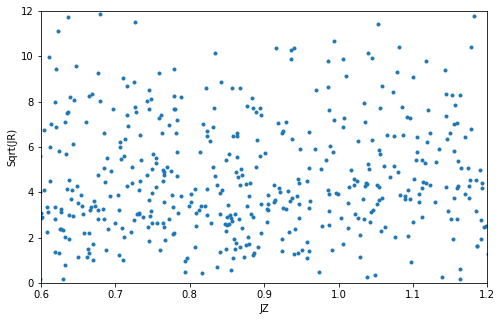

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))
plt.plot(jz*_REFR0*_REFV0,np.sqrt(jR*_REFR0*_REFV0),'.')
plt.xlim(0.6,1.2)
plt.ylim(0,12)
plt.xlabel('JZ')
plt.ylabel('Sqrt(JR)');

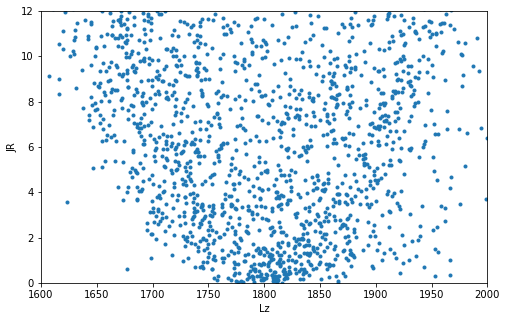

In [52]:
plt.figure(figsize=(8,5))
plt.plot(lz*_REFR0*_REFV0,(jR*_REFR0*_REFV0),'.')
plt.xlim(1600,2000)
plt.ylim(0,12)
plt.xlabel('Lz')
plt.ylabel('JR');